## Breast Cancer (Diagnostic) Data Set
**************

In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [3]:
# Reading the file
data = pd.read_csv('data.csv')

In [4]:
# Overall view of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Checking the first few rows:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Target Variable:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Dropping some of the unwanted variables:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

* There are no null values
* ***id*** and ***Unnamed: 32*** are not required columns. So we will get rid of those.
* There are two outcomes - **Benign Tumor** (which spreads locally) **Malignant Tumor** (which can spread throughout the whole body via blood)

In [12]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['diagnosis']= label_encoder.fit_transform(data['diagnosis']) 
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

Text(0, 0.5, 'Total Number of Patients')

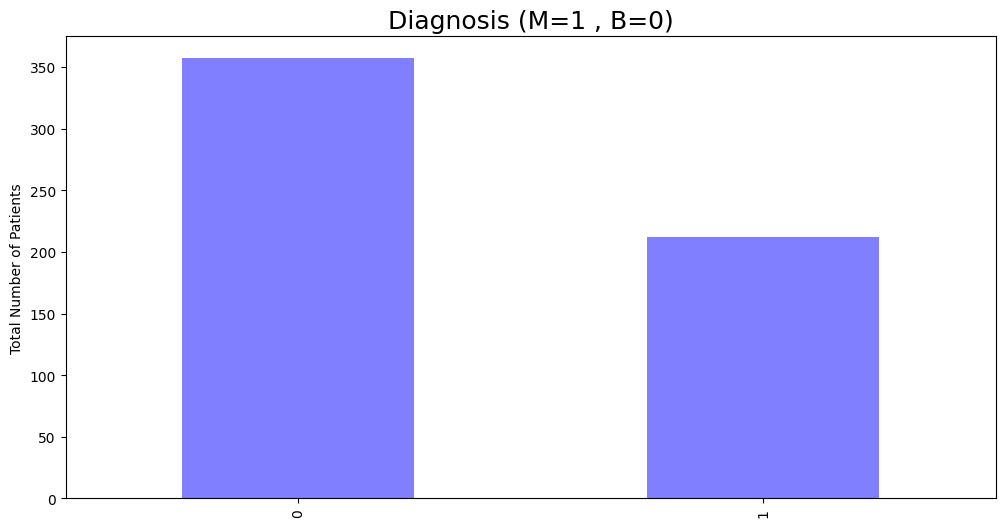

In [14]:
#Looking at the number of patients with Malignant and Benign Tumors:
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")

* ~ 65% of the patients had Benign tumor while the rest of them had Malignant.

#### Considering only mean features of nucleus

In [15]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

#### We will just see how these features coorelate with the diagnosis using heatmap:

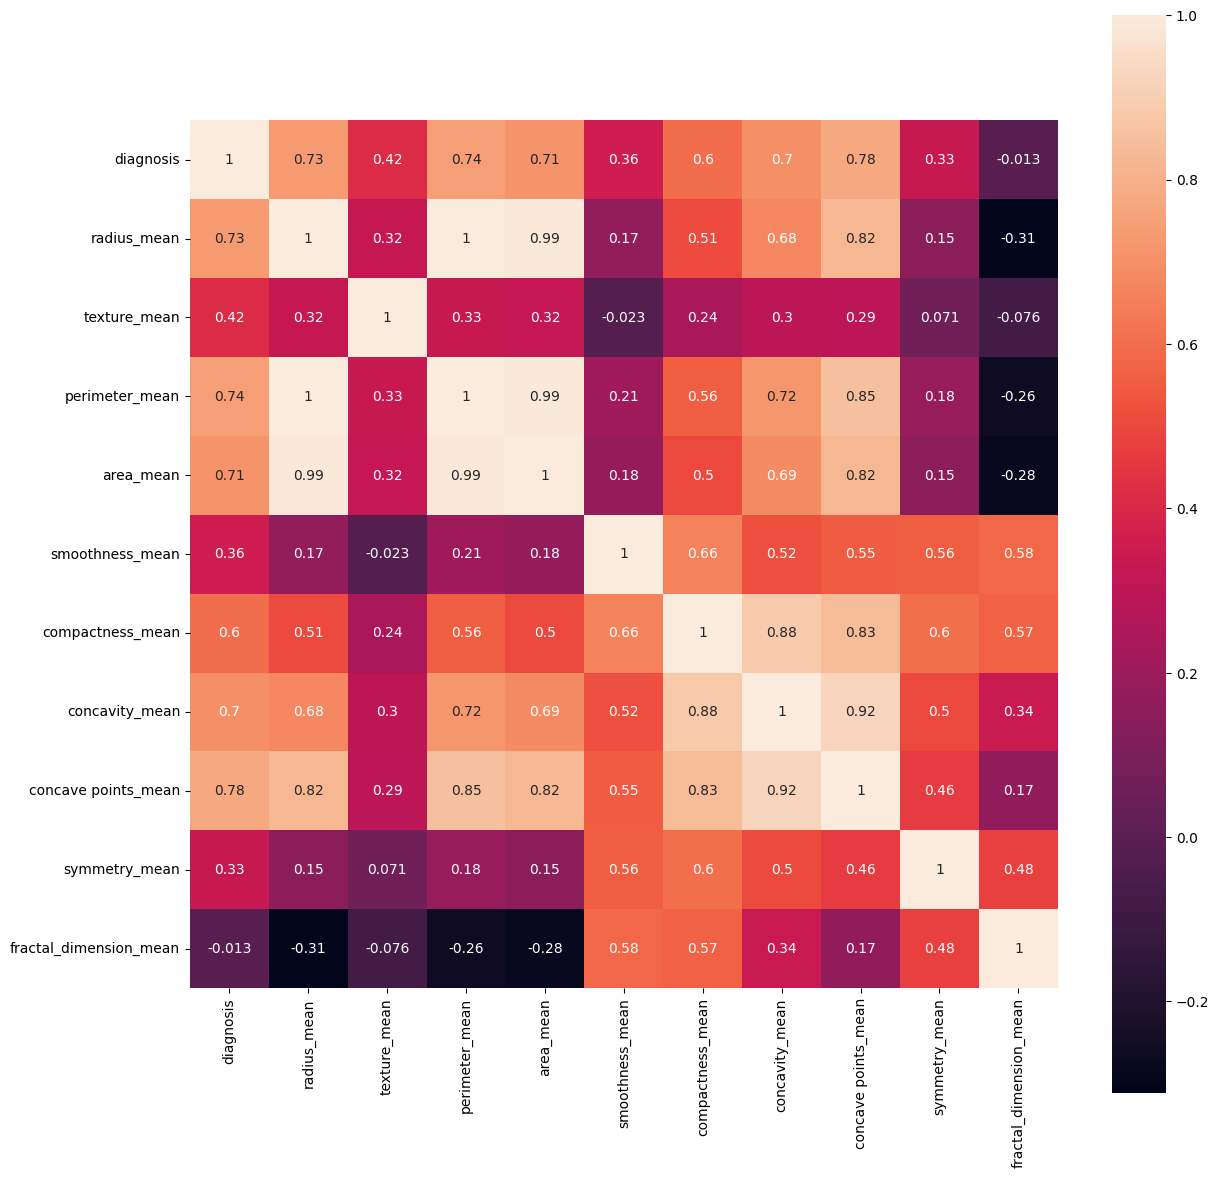

In [17]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

* **radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean** show high coorelation with the **diagnosis**.
* The other variables do not really show high impact over diagnoses.

### Setting up the train and test data:

In [52]:
# separating the data and labels
predictors = data_mean.columns[2:11]
X = data_mean.loc[:,predictors]
Y = data['diagnosis']

In [53]:
Y.isna().sum()

0

In [54]:
X.shape ,Y.shape

((569, 9), (569,))

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

#### Logistic Regression Model:

In [71]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_train)
lr_accuracy=accuracy_score(lr_pred,Y_train)
print("The mean training accuracy is %s" % round(lr_accuracy*100,2))

The mean training accuracy is 90.33


C:\Users\Dell\New folder\envs\ModelML\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SVM:

In [72]:
classifier=svm.SVC(kernel='linear')

In [73]:
#fitting our model to classifier
classifier.fit(X_train,Y_train)
X_train_pred=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_pred, Y_train)
print("The meanc training accuracy is %s" % round(training_accuracy*100,2))

The meanc training accuracy is 90.77


### Random Forest 

In [74]:
# Initiating the model:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_train)
#training accuracy
scores = cross_val_score(rf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()
print("The mean training accuracy is %s" % round(scores*100,2))

The mean training accuracy is 92.98


In [75]:
#testing accuracy
scores1 = cross_val_score(rf, X_test, Y_test, scoring='accuracy' ,cv=10).mean()
print("The mean testing accuracy is %s" % round(scores1*100,2))

The mean testing accuracy is 93.79


#### Naive Bayes:

In [76]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_pred=nb.predict(X_train)
np_accuracy=accuracy_score(nb_pred,Y_train)
print("The mean training accuracy is %s" % round(np_accuracy*100,2))

The mean training accuracy is 91.21


In [77]:
#prediction using random forest 
input_data=[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2678]
input_array=np.asarray(input_data)    #changing input to numpy array
input_data_reshaped=input_array.reshape(1,-1)   #reshaping 
rf.fit(X_train,Y_train)
prediction=rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The Patient is suffering from Benign Tumor (which spreads locally) ")
else:
    print("The Pateint is suffering from Malignant Tumor(which can spread throughout the whole body via blood)")

[0]
The Patient is suffering from Benign Tumor (which spreads locally) 


C:\Users\Dell\New folder\envs\ModelML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## saving the model in .sav extension


In [78]:
import pickle

In [82]:
filename = 'breast.sav'
pickle.dump(rf, open(filename, 'wb'))    #[wb for write binary]

In [83]:
# loading the saved model
model = pickle.load(open('breast.sav', 'rb'))   #[rb for read binary]

In [84]:
#prediction using random forest 
input_data=[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2678]
input_array=np.asarray(input_data)    #changing input to numpy array
input_data_reshaped=input_array.reshape(1,-1)   #reshaping 
rf.fit(X_train,Y_train)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The Patient is suffering from Benign Tumor (which spreads locally) ")
else:
    print("The Pateint is suffering from Malignant Tumor(which can spread throughout the whole body via blood)")

[0]
The Patient is suffering from Benign Tumor (which spreads locally) 


C:\Users\Dell\New folder\envs\ModelML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
for column in X.columns:
  print(column)

texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
